# Credit EDA Case Study - Aakash and Sumit

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Problem Statement:

Understanding how the bank deals with loan. To understand how consumer attributes and loan attributes influence the tendency of default. Finding out various patterns and representing the results to help the bank reduce the credit risk and interest risk.


#### Importing the libraries.

In [1]:
1825502-20211205-ec853bee
EA050417046IN
0084810401041220211627551638615475946
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
#to display all the columns and rows.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# Reading all csv files
prev_app = pd.read_csv('previous_application.csv')
app_data = pd.read_csv('application_data.csv')
col_desc = pd.read_csv('columns_description.csv')


### Application Dataset

In [5]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
app_data.shape

(307511, 122)

In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# Checking null values in columns of app_data
round(app_data.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [9]:
# Getting all the columns having more than 30% null values in app_data
emptycol=app_data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(app_data))]
len(emptycol)

50

In [10]:
# Checking all the columns before dropping them(having more then 30% null)
emptycol

OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE           

In [11]:
# Dropping all the columns having more than 30% null values in app_data
app_data_final = app_data.drop(labels=list(emptycol.index), axis = 1)

In [12]:
# Checking null % of final app dataset
round(app_data_final.isnull().mean()*100,2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_8                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [13]:
# Getting column info of final app dataset
app_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
app_data_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_data_final.shape

(307511, 72)

### Checking categorical columns 

In [16]:
app_data_final['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
# We have XNA in gender which means null value, so we are replacing it with F as mode for f is more and so probablity of it being F is more
app_data_final['CODE_GENDER'] = app_data_final['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [18]:
app_data_final['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
app_data_final['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [20]:
app_data_final['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [21]:
app_data_final['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [22]:
app_data_final['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [23]:
app_data_final['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [24]:
app_data_final['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [25]:
app_data_final['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [26]:
app_data_final['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [27]:
app_data_final['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [28]:
#Checking % of XNA value in ORGANIZATION_TYPE 
app_data_final[app_data_final['ORGANIZATION_TYPE'] == 'XNA']['ORGANIZATION_TYPE'].count()/app_data_final['ORGANIZATION_TYPE'].count()*100

18.00716071945394

In [29]:
#18% is less so we can remove these rows in our analysis
app_data_final = app_data_final[~(app_data_final['ORGANIZATION_TYPE'] == 'XNA')]

In [30]:
app_data_final.shape

(252137, 72)

## Dividing dataset according to target Value(0,1)

In [31]:
app_data_target0 = app_data_final[app_data_final['TARGET'] == 0]

In [32]:
app_data_target1 = app_data_final[app_data_final['TARGET'] == 1]

In [33]:
app_data_target0.shape

(230302, 72)

In [34]:
app_data_target1.shape

(21835, 72)

## Creating Income and credit brackets for analysis and target 0

In [35]:
app_data_target0['AMT_INCOME_TOTAL'].describe()

count    2.303020e+05
mean     1.764984e+05
std      1.154998e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.160000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
# Creating range of income
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,100000000]
ranges=['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data_target0['AMT_INCOME_RANGE']=pd.cut(app_data_target0['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [37]:
app_data_target0[['AMT_INCOME_TOTAL','AMT_INCOME_RANGE']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_RANGE
1,270000.0,250000-275000
2,67500.0,50000-75000
3,135000.0,125000-150000
4,121500.0,100000-125000
5,99000.0,75000-100000


In [38]:
app_data_target0['AMT_CREDIT'].describe()

count    2.303020e+05
mean     6.164879e+05
std      4.114378e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.353800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [39]:
# Creating range of credit amount of loan
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,10000000]
ranges=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_data_target0['AMT_CREDIT_RANGE']=pd.cut(app_data_target0['AMT_CREDIT'],bins=bins,labels=ranges)

In [40]:
app_data_target0[['AMT_CREDIT','AMT_CREDIT_RANGE']].head()

,AMT_CREDIT,AMT_CREDIT_RANGE
1,1293502.5,900000 and above
2,135000.0,0-150000
3,312682.5,300000-350000
4,513000.0,500000-550000
5,490495.5,450000-500000


### Creating Income and credit brackets for analysis and target 1

In [41]:
app_data_target1['AMT_INCOME_TOTAL'].describe()

count    2.183500e+04
mean     1.697506e+05
std      7.956149e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
#Creating range of income
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,100000000]
ranges=['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data_target1['AMT_INCOME_RANGE']=pd.cut(app_data_target1['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [43]:
app_data_target1[['AMT_INCOME_TOTAL','AMT_INCOME_RANGE']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_RANGE
0,202500.0,200000-225000
26,112500.0,100000-125000
40,202500.0,200000-225000
42,135000.0,125000-150000
94,315000.0,300000-325000


In [44]:
app_data_target1['AMT_CREDIT'].describe()

count    2.183500e+04
mean     5.577178e+05
std      3.460483e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.959855e+05
75%      7.290000e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

In [45]:
#Creating range of credit amount of loan
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,10000000]
ranges=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_data_target1['AMT_CREDIT_RANGE']=pd.cut(app_data_target1['AMT_CREDIT'],bins=bins,labels=ranges)

In [46]:
app_data_target1[['AMT_CREDIT','AMT_CREDIT_RANGE']].head()

,AMT_CREDIT,AMT_CREDIT_RANGE
0,406597.5,400000-450000
26,979992.0,900000 and above
40,1193580.0,900000 and above
42,288873.0,250000-300000
94,953460.0,900000 and above


### Univariate analysis

**Clients not having difficulty to pay vs Clients having difficulty to pay** 

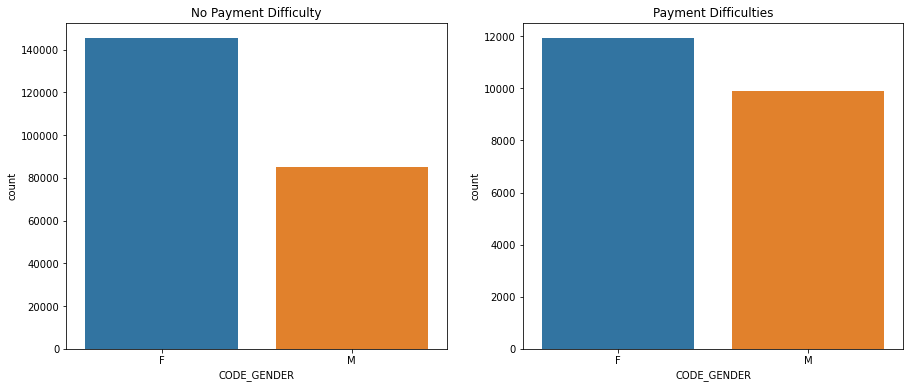

In [47]:
#Distribution of gender
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = app_data_target0, x='CODE_GENDER', order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, x='CODE_GENDER', order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
plt.show()

**`Inferences:`** From the above plot we can conclude that Females have more credit than Males. Ratio wise Males are facing more difficulties in paying back the loan.

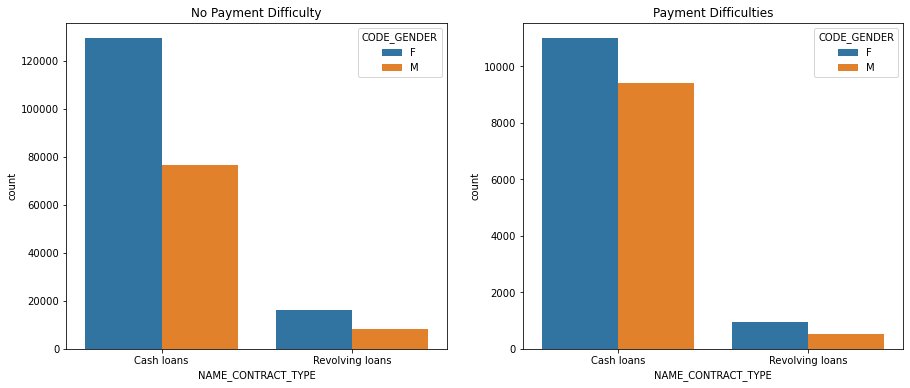

In [48]:
#Distribution of NAME_CONTRACT_TYPE
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = app_data_target0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', hue_order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', hue_order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
plt.show()

**`Inferences:`** 
- 'Cash Loans' are much more than 'Revolving loans'
- Female have high credit for both 'Cash Loans' and 'Revolving Loans'
- Males have more payment difficulties for 'Cash Loans' when compared to 'Revolving Loans'

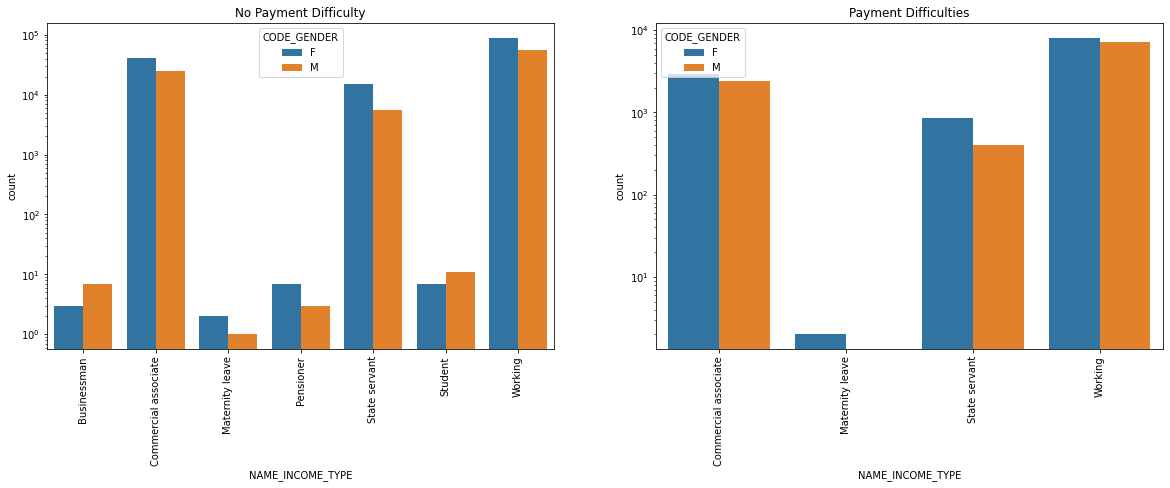

In [49]:
#Taking the log value in y scale as student,pensioner,businessman have very less value compared to others
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.countplot(data = app_data_target0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', order=app_data_target0.NAME_INCOME_TYPE.sort_values().unique(), hue_order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', order=app_data_target1.NAME_INCOME_TYPE.sort_values().unique(), hue_order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
plt.show()

**`Inferences:`**
- State servant, Working and Commercial associate have much more credits then others
- For Businessman and Student, Males have more credit then Females

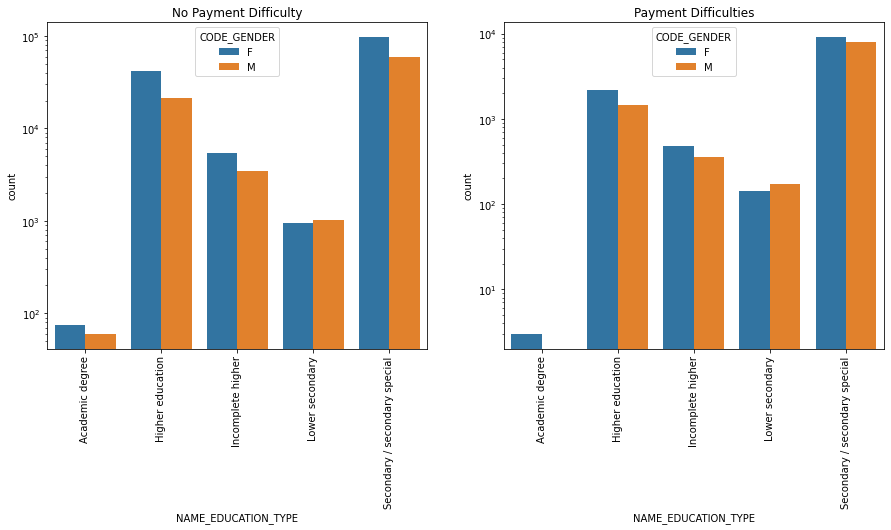

In [50]:
#Distribution of Education Type
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = app_data_target0, x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', order=app_data_target0.NAME_EDUCATION_TYPE.sort_values().unique(), hue_order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', order=app_data_target1.NAME_EDUCATION_TYPE.sort_values().unique(), hue_order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
plt.show()

**`Inferences:`** For Lower Secondary education, Males have higher credit then Females, except that for all the other education type credit for Female is more 

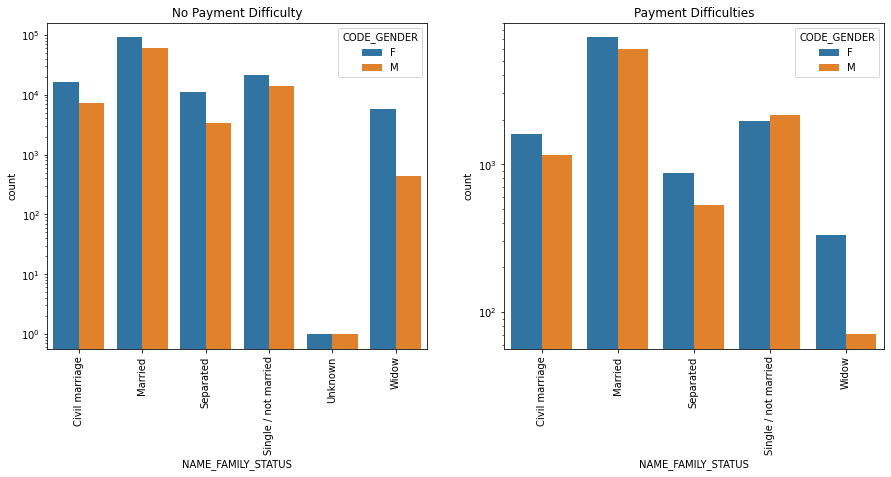

In [51]:
#Distribution of Family Status
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data = app_data_target0, x='NAME_FAMILY_STATUS', hue='CODE_GENDER', order=app_data_target0.NAME_FAMILY_STATUS.sort_values().unique(), hue_order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, x='NAME_FAMILY_STATUS', hue='CODE_GENDER', order=app_data_target1.NAME_FAMILY_STATUS.sort_values().unique(), hue_order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
plt.show()

**`Inferences:`** Married has the highest credit. For all the Family Status, Females have higher credit. Widow females find it very difficult to repay the loans in comparison to widow males.

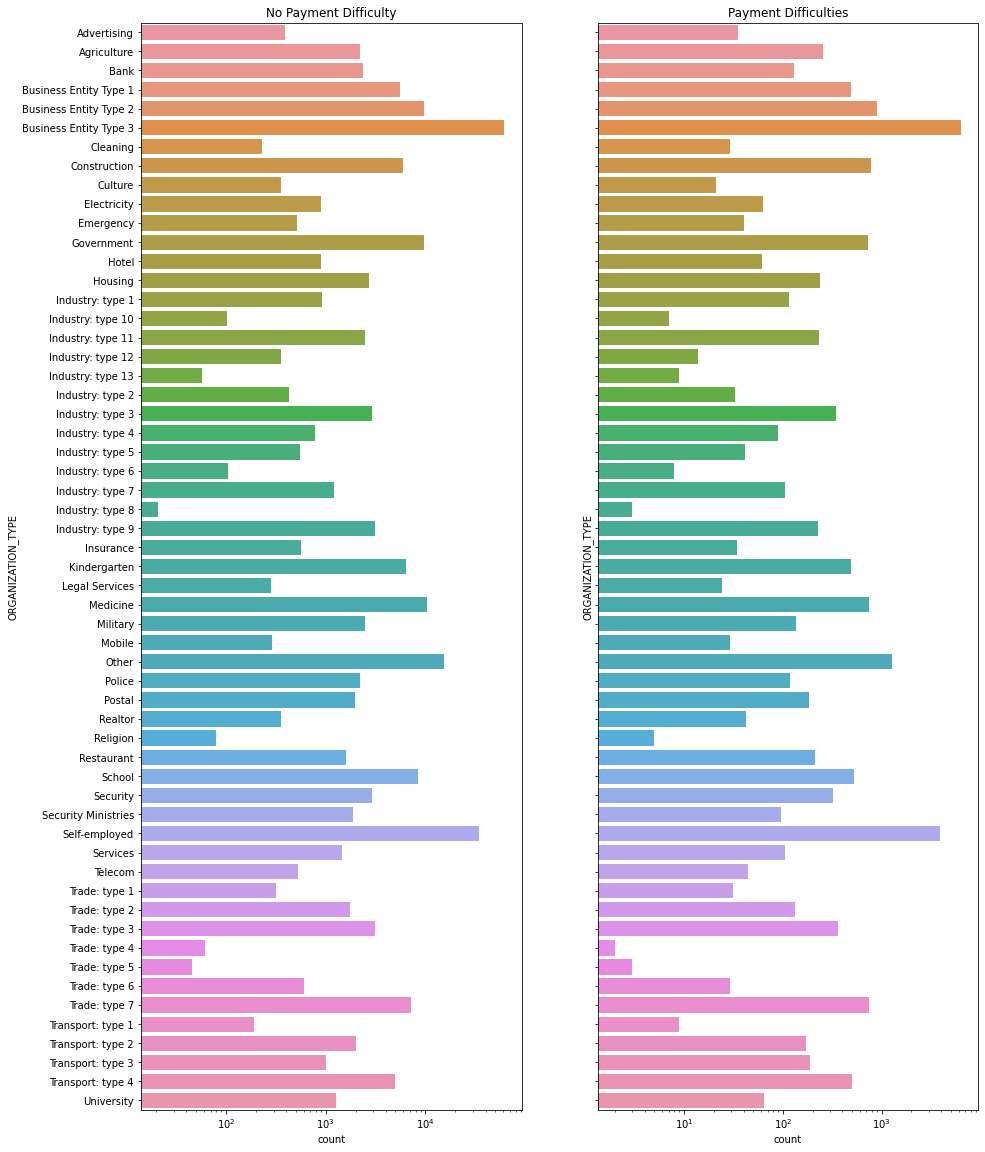

In [52]:
# Plotting Distribution of Organization type
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,20), sharey=True)
sns.countplot(data = app_data_target0, y='ORGANIZATION_TYPE', order=app_data_target0.ORGANIZATION_TYPE.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, y='ORGANIZATION_TYPE', order=app_data_target1.ORGANIZATION_TYPE.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.show()

**`Inferences:`** Business Entity type 3 has highest credit as well as payment difficulties.

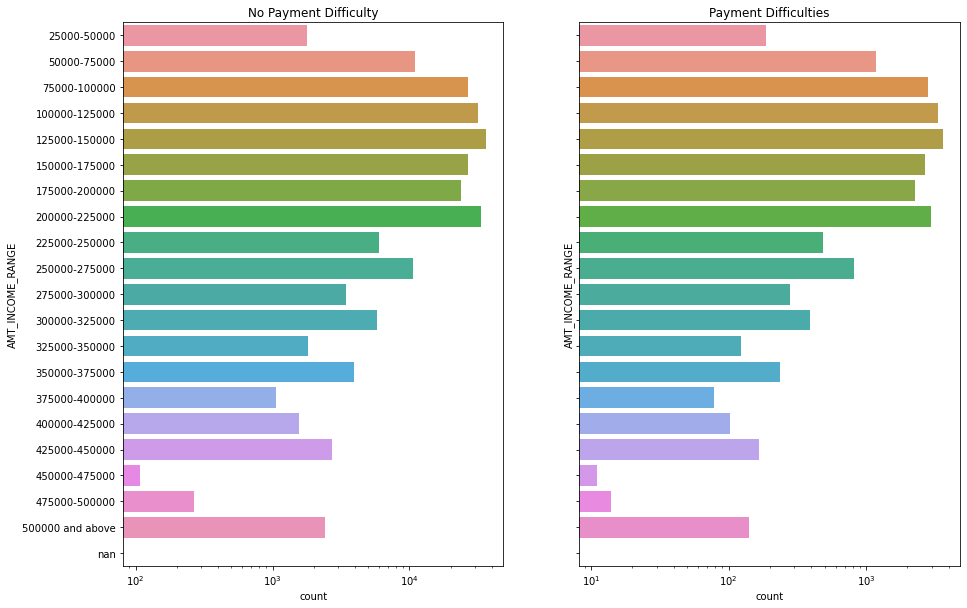

In [53]:
# Income Range analysis
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10), sharey=True)
sns.countplot(data = app_data_target0, y='AMT_INCOME_RANGE', order=app_data_target0.AMT_INCOME_RANGE.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, y='AMT_INCOME_RANGE', order=app_data_target1.AMT_INCOME_RANGE.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.show()

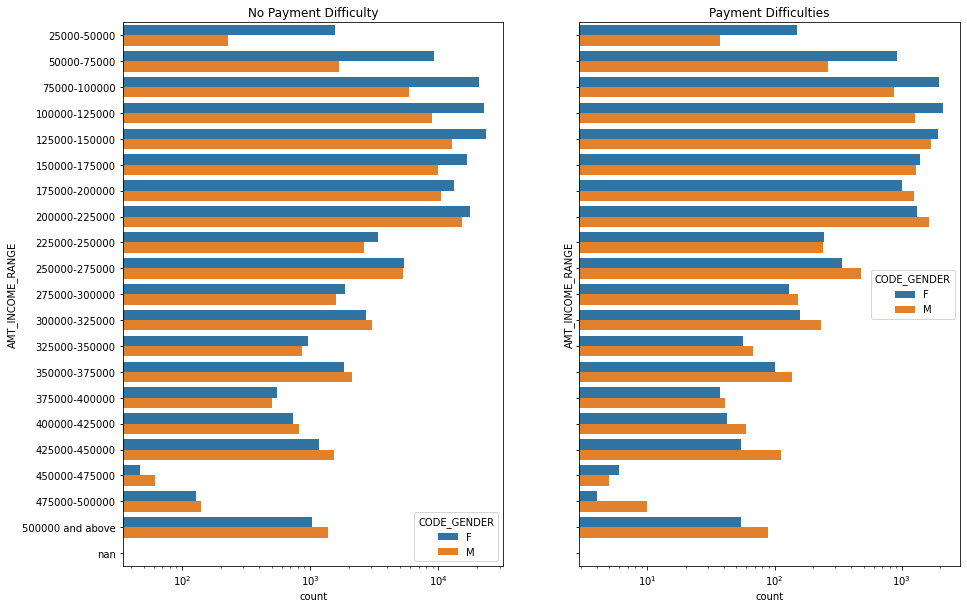

In [54]:
#Plotting Distribution of Income Range
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10), sharey=True)
sns.countplot(data = app_data_target0, y='AMT_INCOME_RANGE', hue='CODE_GENDER', order=app_data_target0.AMT_INCOME_RANGE.sort_values().unique(), hue_order=app_data_target0.CODE_GENDER.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, y='AMT_INCOME_RANGE', hue='CODE_GENDER', order=app_data_target1.AMT_INCOME_RANGE.sort_values().unique(), hue_order=app_data_target1.CODE_GENDER.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.show()

**`Inferences:`** Credit is maximum for income range of 75000 to 225000 and after that it decreases.

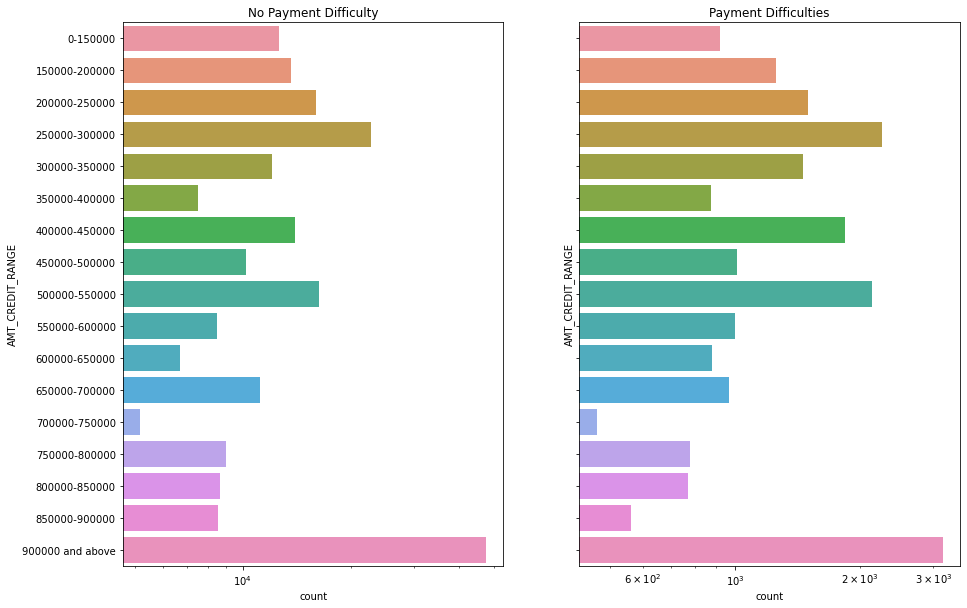

In [55]:
#Plotting Distribution of Credit Range
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10), sharey=True)
sns.countplot(data = app_data_target0, y='AMT_CREDIT_RANGE', order=app_data_target0.AMT_CREDIT_RANGE.sort_values().unique(), ax=ax1)
sns.countplot(data = app_data_target1, y='AMT_CREDIT_RANGE', order=app_data_target1.AMT_CREDIT_RANGE.sort_values().unique(), ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.show()

**`Inferences:`** Most people take credit in range of 900000 and above.

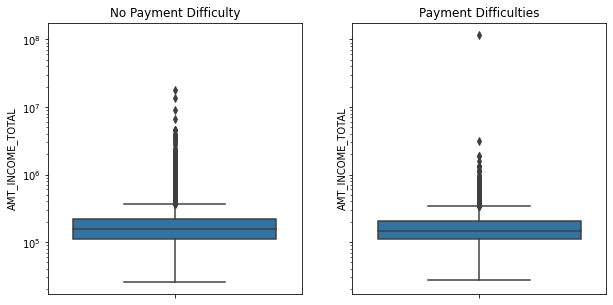

In [56]:
#box plot for AMT_INCOME_TOTAL
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharey=True)
sns.boxplot(data = app_data_target0, y='AMT_INCOME_TOTAL', ax=ax1)
sns.boxplot(data = app_data_target1, y='AMT_INCOME_TOTAL', ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

**`Inferences:`** From the above plot we can conclude that the 3rd quartile is smaller than 1st quartile so most no of client are in 1st quartile.

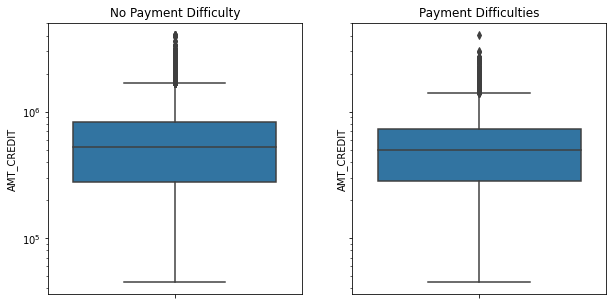

In [57]:
#box plot for AMT_CREDIT
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharey=True)
sns.boxplot(data = app_data_target0, y='AMT_CREDIT', ax=ax1)
sns.boxplot(data = app_data_target1, y='AMT_CREDIT', ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

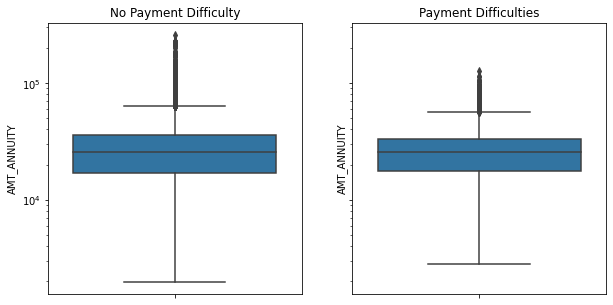

In [58]:
#box plot for AMT_ANNUITY
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5), sharey=True)
sns.boxplot(data = app_data_target0, y='AMT_ANNUITY', ax=ax1)
sns.boxplot(data = app_data_target1, y='AMT_ANNUITY', ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

From the above box plots of AMT_ANNUITY, AMT_CREDIT we can conclude that:
   - Most Annuity client is present in first quartile .
   - Most amount credit is also in first quartile .
   - Outliers are present in both the plots.

### Bivariate and Multivariate Analysis

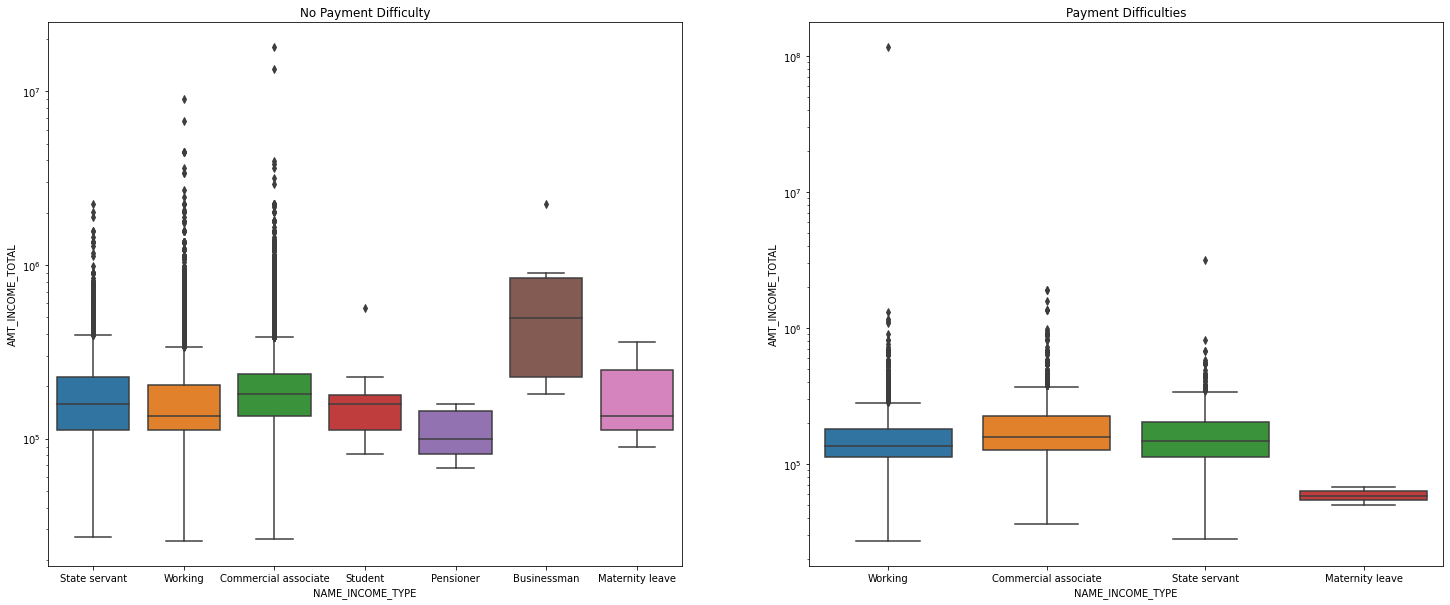

In [59]:
# NAME_INCOME_TYPE vs AMOUNT_TOTAL_INCOME
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
sns.boxplot(x=app_data_target0.NAME_INCOME_TYPE, y=app_data_target0.AMT_INCOME_TOTAL, ax=ax1)
sns.boxplot(x=app_data_target1.NAME_INCOME_TYPE, y=app_data_target1.AMT_INCOME_TOTAL, ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

**`Inferences:`**
- Businessman have high median income and less outliers.
- State Servent, Working, Commercial associate do not have high median income as businessman but there are lot of outliers.

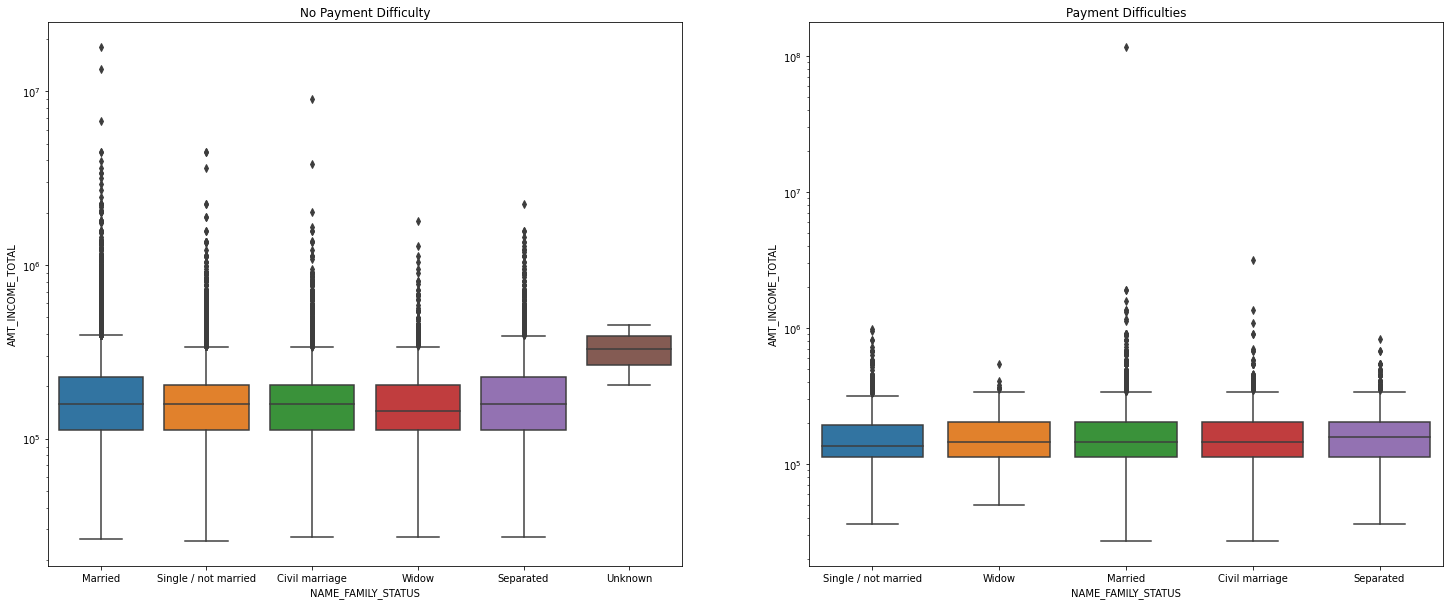

In [60]:
# NAME_FAMILY_STATUS vs AMOUNT_TOTAL_INCOME
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,10))
sns.boxplot(x=app_data_target0.NAME_FAMILY_STATUS, y=app_data_target0.AMT_INCOME_TOTAL, ax=ax1)
sns.boxplot(x=app_data_target1.NAME_FAMILY_STATUS, y=app_data_target1.AMT_INCOME_TOTAL, ax=ax2)
ax1.title.set_text('No Payment Difficulty')
ax2.title.set_text('Payment Difficulties')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.show()

**`Inferences:`**
   - For Clients not having Payment problem, 'Unknown' have highest total income.
   - For Client having Payment problem, 'Seperated' have higher median total income. 

In [61]:
# Getting columns for Correlation for target 0
corr_columns = [ 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_BIRTH','DAYS_EMPLOYED']
app_data_corr0 = app_data_target0.loc[:,corr_columns]
app_data_corr0.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED
1,0,270000.0,1293502.5,35698.5,1129500.0,0,0,0,0,0,0,1,1,-16765,-1188
2,0,67500.0,135000.0,6750.0,135000.0,0,0,0,0,0,0,2,2,-19046,-225
3,0,135000.0,312682.5,29686.5,297000.0,0,0,0,0,0,0,2,2,-19005,-3039
4,0,121500.0,513000.0,21865.5,513000.0,0,0,0,0,1,1,2,2,-19932,-3038
5,0,99000.0,490495.5,27517.5,454500.0,0,0,0,0,0,0,2,2,-16941,-1588


In [62]:
# Correlation for target 0
corr_tar0 = app_data_corr0.corr(method='spearman')
corr_tar0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010799,-0.027086,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295,0.035561,0.034350,0.266534,0.030948
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472217,0.408533,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758,-0.216438,-0.238145,-0.054666,-0.060868
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826706,0.985074,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194,-0.091606,-0.100894,-0.169030,-0.104251
AMT_ANNUITY,-0.010799,0.472217,0.826706,1.000000,0.824348,0.033442,0.070856,0.069069,-0.019953,-0.024084,-0.008085,-0.119100,-0.133179,-0.100290,-0.074646
AMT_GOODS_PRICE,-0.027086,0.408533,0.985074,0.824348,1.000000,0.016805,0.043047,0.045806,-0.041940,-0.039564,-0.013209,-0.094053,-0.102857,-0.169016,-0.109327
REG_REGION_NOT_LIVE_REGION,-0.022813,0.077634,0.015118,0.033442,0.016805,1.000000,0.461596,0.090193,0.342321,0.142429,0.003479,-0.043830,-0.040376,0.058627,0.065435
REG_REGION_NOT_WORK_REGION,-0.015475,0.159962,0.041693,0.070856,0.043047,0.461596,1.000000,0.860421,0.148476,0.220372,0.178472,-0.152158,-0.145791,0.038104,0.086966
LIVE_REGION_NOT_WORK_REGION,-0.005576,0.148281,0.045175,0.069069,0.045806,0.090193,0.860421,1.000000,0.015010,0.167753,0.220865,-0.159358,-0.153891,0.012789,0.063533
REG_CITY_NOT_LIVE_CITY,0.002344,-0.001023,-0.040616,-0.019953,-0.041940,0.342321,0.148476,0.015010,1.000000,0.442640,0.011782,0.038851,0.050532,0.167477,0.118224
REG_CITY_NOT_WORK_CITY,0.007487,-0.013856,-0.037000,-0.024084,-0.039564,0.142429,0.220372,0.167753,0.442640,1.000000,0.820828,0.016092,0.039465,0.111539,0.125954


In [63]:
#  Getting columns for Correlation for target 1
app_data_corr1 = app_data_target1.loc[:,corr_columns]
app_data_corr1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED
0,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,0,0,2,2,-9461,-637
26,0,112500.0,979992.0,27076.5,702000.0,0,0,0,0,0,0,3,2,-18724,-2628
40,0,202500.0,1193580.0,35028.0,855000.0,0,0,0,0,0,0,2,2,-17482,-1262
42,0,135000.0,288873.0,16258.5,238500.0,0,0,0,0,0,0,3,3,-13384,-3597
94,0,315000.0,953460.0,64107.0,900000.0,0,0,0,0,1,1,2,2,-10199,-2015


In [64]:
# Correlation for target 1
corr_tar1 = app_data_corr1.corr(method='spearman')
corr_tar1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.005807,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557,0.048236,0.049688,0.175025,0.006823
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.369419,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230,-0.163605,-0.181015,-0.103026,-0.053798
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.976307,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465,-0.050664,-0.063304,-0.200718,-0.107605
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.806543,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012,-0.059905,-0.076330,-0.100200,-0.060193
AMT_GOODS_PRICE,-0.005807,0.369419,0.976307,0.806543,1.000000,0.018467,0.036913,0.038112,-0.031660,-0.034358,-0.012493,-0.060749,-0.072662,-0.198895,-0.116050
REG_REGION_NOT_LIVE_REGION,-0.035213,0.075615,0.015043,0.029646,0.018467,1.000000,0.506747,0.068368,0.322030,0.150968,-0.013946,-0.032817,-0.030155,0.046320,0.069566
REG_REGION_NOT_WORK_REGION,-0.040853,0.156374,0.032536,0.060363,0.036913,0.506747,1.000000,0.846872,0.141416,0.224370,0.181231,-0.111403,-0.106376,0.022208,0.082264
LIVE_REGION_NOT_WORK_REGION,-0.027993,0.145982,0.034861,0.059724,0.038112,0.068368,0.846872,1.000000,-0.006978,0.167717,0.233975,-0.117360,-0.112887,0.000356,0.056081
REG_CITY_NOT_LIVE_CITY,-0.016072,-0.003813,-0.030974,-0.011744,-0.031660,0.322030,0.141416,-0.006978,1.000000,0.478266,-0.029432,0.042244,0.053461,0.145884,0.118869
REG_CITY_NOT_WORK_CITY,-0.005444,-0.006241,-0.032882,-0.015938,-0.034358,0.150968,0.224370,0.167717,0.478266,1.000000,0.768247,0.008135,0.031579,0.096181,0.139863


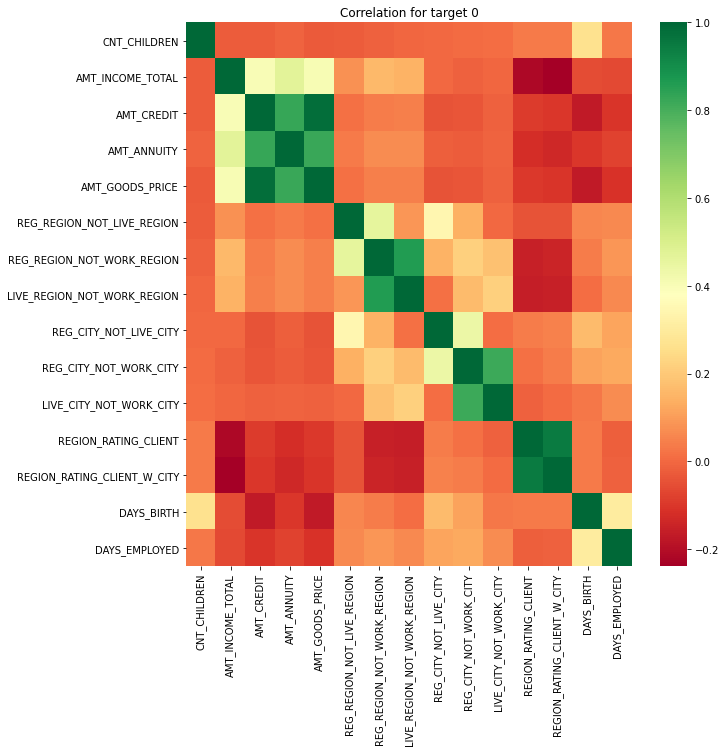

In [65]:
#Plotting Correlation for target 0 (No Payment Difficulty)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_tar0, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 0')
plt.show()

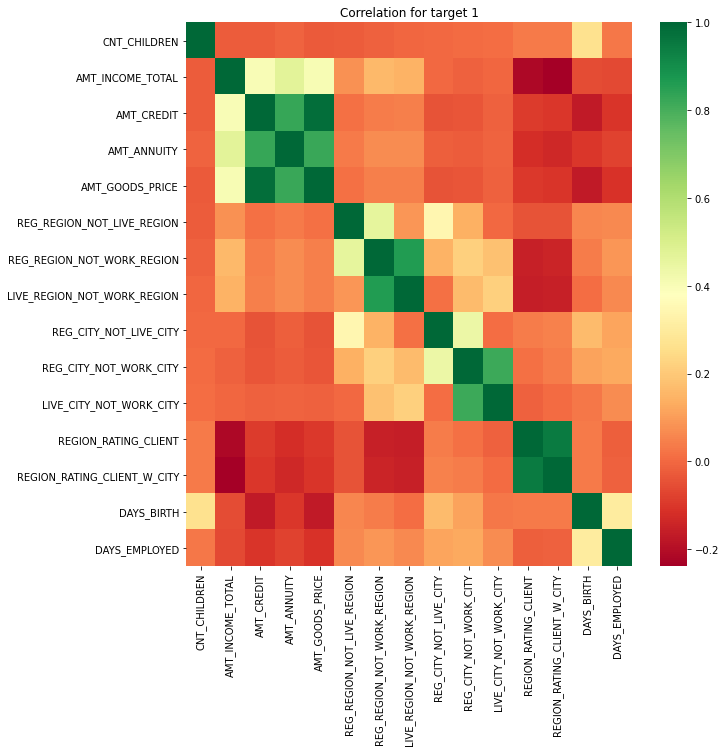

In [66]:
#Plotting Correlation for target 1 (Payment Difficulties)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_tar0, cmap="RdYlGn",annot=False)
plt.title('Correlation for target 1')
plt.show()

**`Inferences:`**
- Total Income is having high negitive correlation with region_client_rating i.e. if income is high, city rating is on lower side and vise versa.
- live_region_not_work_region have high negitave correlation to Region_client_rating ie. if a client is not living in working region then the region rating is on lower side and vise versa.

### Previous Applications Dataset

In [67]:
#head of the data frame.
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#print the information of variables to check their data types.
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [69]:
# checking the number of rows and columns in the dataframe
prev_app.shape

(1670214, 37)

In [70]:
# checking the summary for the numerical columns 
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [71]:
# checking the summary for the categorical columns 
prev_app.describe(include='object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


#### Handling the nulls

In [72]:
# checking the nulls in the dataset
prev_app.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [73]:
# Dropping columns with more than 20% of null values
prev_app = prev_app.loc[:,prev_app.isnull().mean()<=0.2]
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [74]:
# Checking PRODUCT_COMBINATION column
prev_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [75]:
# Filling the missing values of Product_Combination with mode value.
prev_app.PRODUCT_COMBINATION.fillna(prev_app.PRODUCT_COMBINATION.mode()[0], inplace=True)
prev_app.PRODUCT_COMBINATION.value_counts(normalize=True)*100

Cash                              17.143671
POS household with interest       15.783726
POS mobile with interest          13.212079
Cash X-Sell: middle                8.614645
Cash X-Sell: low                   7.798282
Card Street                        6.740573
POS industry with interest         5.917385
POS household without interest     4.963915
Card X-Sell                        4.824651
Cash Street: high                  3.570740
Cash X-Sell: high                  3.550503
Cash Street: middle                2.075063
Cash Street: low                   2.025728
POS mobile without interest        1.441851
POS other with interest            1.429697
POS industry without interest      0.754514
POS others without interest        0.152974
Name: PRODUCT_COMBINATION, dtype: float64

In [76]:
# Checking nulls in AMT_CREDIT column
prev_app[prev_app.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,NaN,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,XNA,Card Street


In [77]:
# Replacing the null value with 0.0 since the AMT_APPLICATION is 0.0
prev_app.AMT_CREDIT.fillna(0.0, inplace=True)

In [78]:
prev_app.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [79]:
# Changing 'XNA' and 'XAP' to NaN
prev_app.loc[prev_app.NAME_CONTRACT_TYPE.isin(['XNA','XAP']),"NAME_CONTRACT_TYPE"]=np.NaN
prev_app.loc[prev_app.NAME_CASH_LOAN_PURPOSE.isin(['XNA','XAP']),"NAME_CASH_LOAN_PURPOSE"]=np.NaN
prev_app.loc[prev_app.NAME_PAYMENT_TYPE.isin(['XNA','XAP']),"NAME_PAYMENT_TYPE"]=np.NaN
prev_app.loc[prev_app.CODE_REJECT_REASON.isin(['XNA','XAP']),"CODE_REJECT_REASON"]=np.NaN
prev_app.loc[prev_app.NAME_CLIENT_TYPE.isin(['XNA','XAP']),"NAME_CLIENT_TYPE"]=np.NaN
prev_app.loc[prev_app.NAME_GOODS_CATEGORY.isin(['XNA','XAP']),"NAME_GOODS_CATEGORY"]=np.NaN
prev_app.loc[prev_app.NAME_PORTFOLIO.isin(['XNA','XAP']),"NAME_PORTFOLIO"]=np.NaN
prev_app.loc[prev_app.NAME_PRODUCT_TYPE.isin(['XNA','XAP']),"NAME_PRODUCT_TYPE"]=np.NaN
prev_app.loc[prev_app.NAME_SELLER_INDUSTRY.isin(['XNA','XAP']),"NAME_SELLER_INDUSTRY"]=np.NaN
prev_app.loc[prev_app.NAME_YIELD_GROUP.isin(['XNA','XAP']),"NAME_YIELD_GROUP"]=np.NaN


#### Analysis of Previous Application data

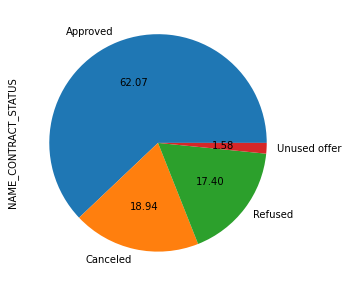

In [80]:
# Pie chart of NAME_CONTRACT_STATUS 
plt.figure(figsize=[10,5])
prev_app.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%.2f')
plt.show()

**`Inferences:`** Approximately 62% of previous loan applications got approved while less than 18% were refused.

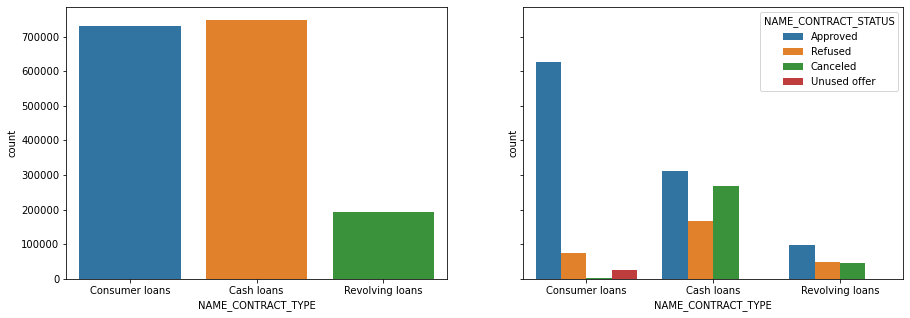

In [81]:
# Analysis of NAME_CONTRACT_TYPE
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)
sns.countplot(data = prev_app, x="NAME_CONTRACT_TYPE", ax=ax1)
sns.countplot(data = prev_app, x="NAME_CONTRACT_TYPE", hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

**`Inferences:`** Majority of the applicants applied for 'Cash Loans' or 'Consumer Loans'. The approval rate was best for 'Consumer Loans'.

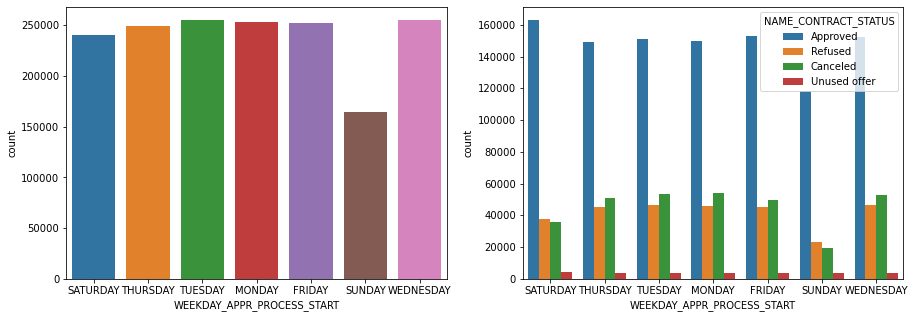

In [82]:
# Analysis of WEEKDAY_APPR_PROCESS_START
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = "WEEKDAY_APPR_PROCESS_START", data = prev_app, ax=ax1)
sns.countplot(x = "WEEKDAY_APPR_PROCESS_START", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

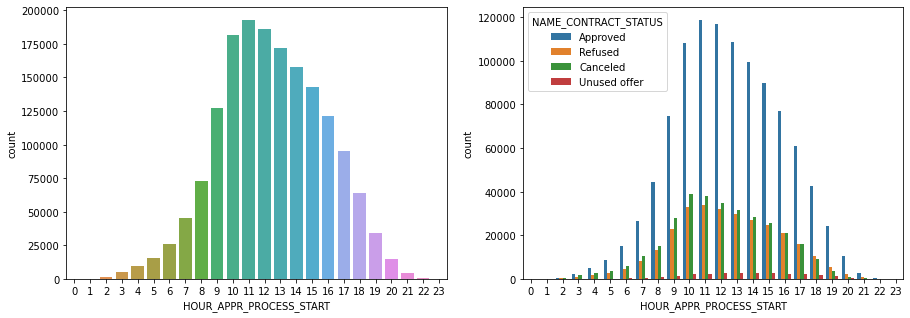

In [83]:
# Analysis of HOUR_APPR_PROCESS_START
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = "HOUR_APPR_PROCESS_START", data = prev_app, ax=ax1)
sns.countplot(x = "HOUR_APPR_PROCESS_START", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

**`Inferences:`** As expected, the peak in number of applications was seen during afternoon hours of weekdays.

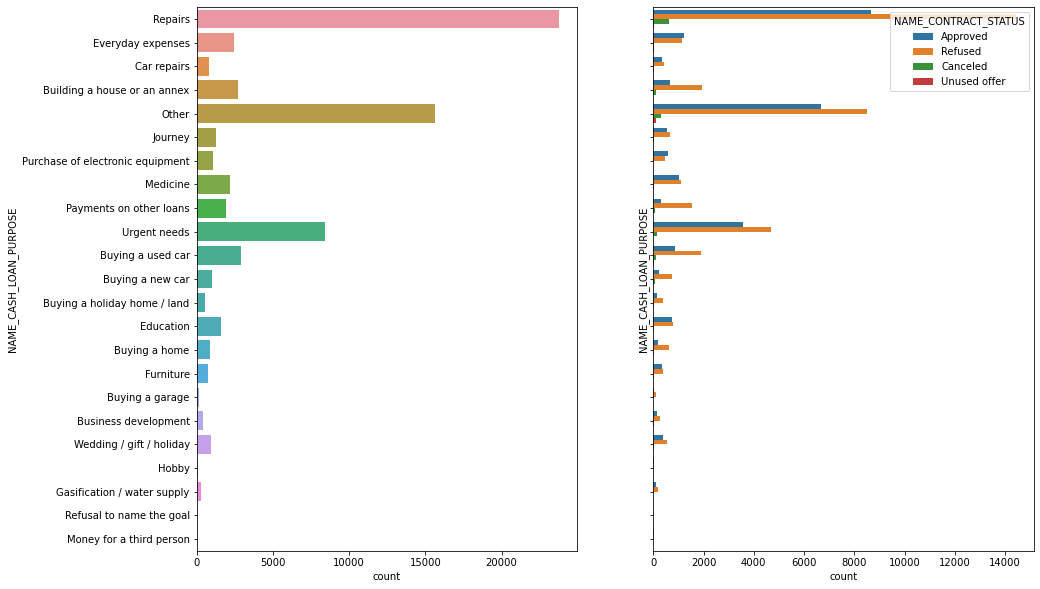

In [84]:
# Analysis of NAME_CASH_LOAN_PURPOSE

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10), sharey=True)
sns.countplot(y = "NAME_CASH_LOAN_PURPOSE", data = prev_app, ax=ax1, orient='v')
sns.countplot(y = "NAME_CASH_LOAN_PURPOSE", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2, orient='v')
plt.show()

**`Inferences:`** Majority of the loan applications were for 'Repair' work.

<Figure size 720x360 with 0 Axes>

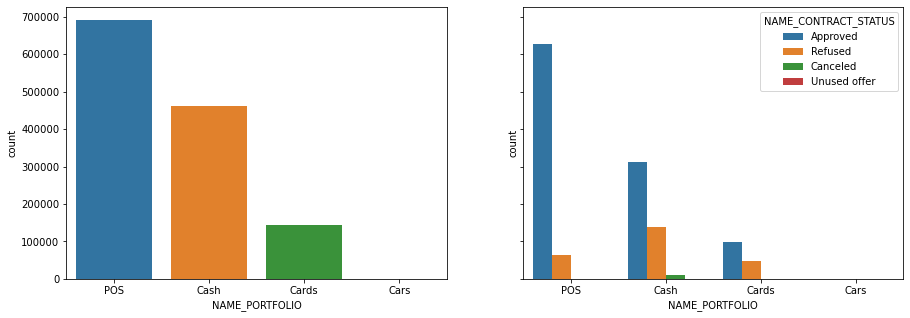

In [85]:
# Analysis of NAME_PORTFOLIO
plt.figure(figsize=[10,5])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)
sns.countplot(x = "NAME_PORTFOLIO", data = prev_app, ax=ax1)
sns.countplot(x = "NAME_PORTFOLIO", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

**`Inferences:`** The maximum number of applications were for 'POS'. Approval rate wise, 'POS' was the best of all.

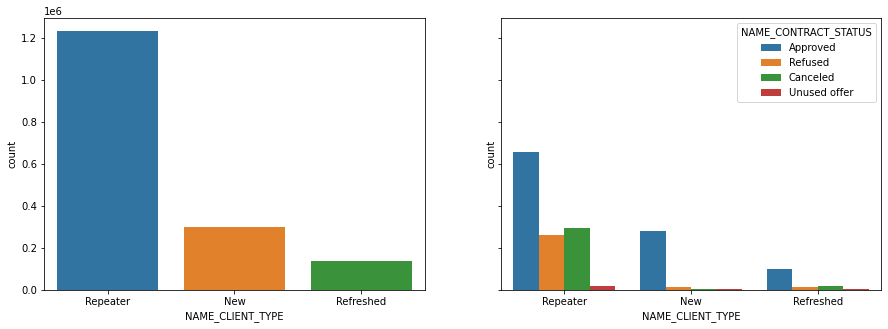

In [86]:
# Analysis of NAME_CLIENT_TYPE
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5), sharey=True)
sns.countplot(x = "NAME_CLIENT_TYPE", data = prev_app, ax=ax1)
sns.countplot(x = "NAME_CLIENT_TYPE", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

**`Inferences:`** More than 70% of applications were from 'Repeaters'. 'New' applicant group has the best approval rate.

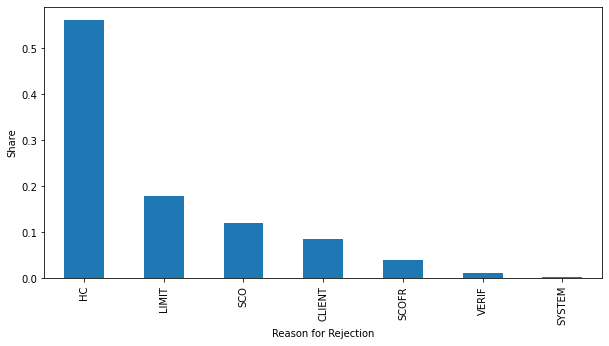

In [87]:
# Bar plot for CODE_REJECT_REASON
plt.figure(figsize=[10,5])
prev_app.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar()
plt.xlabel("Reason for Rejection")
plt.ylabel("Share")
plt.show()

**`Inferences:`** Reason for rejection of more than 50% of rejected application was 'HC'. 

<Figure size 720x360 with 0 Axes>

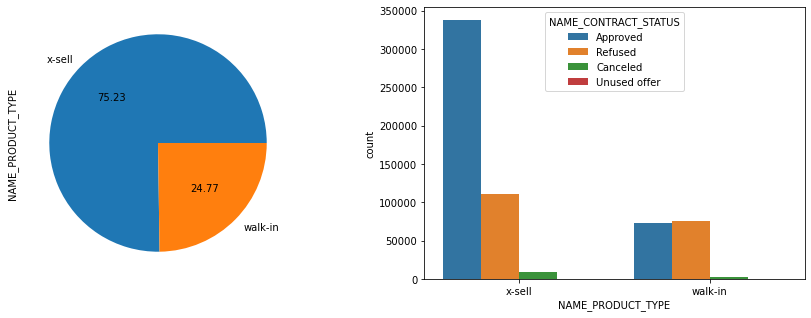

In [88]:
# Analysis of NAME_PRODUCT_TYPE 
plt.figure(figsize=[10,5])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
prev_app.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.pie(autopct='%.2f', ax=ax1)
sns.countplot(x = "NAME_PRODUCT_TYPE", data = prev_app, hue="NAME_CONTRACT_STATUS", ax=ax2)
plt.show()

**`Inferences:`** Almost 75% of applications belongs to 'x-sell' product type. The approval rate of 'x-sell' is much better than 'walk-in'.

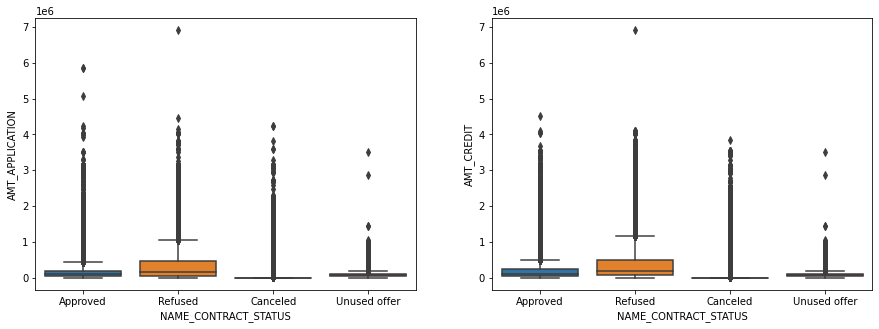

In [89]:
# Analysis of AMT_APPLICATION and AMT_CREDIT.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=prev_app, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', ax=ax1)
sns.boxplot(data=prev_app, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', ax=ax2)
plt.show()

**`Inferences:`** Applications with higher loan application amount are likely to be refused. Also, low credit amount are very likely to be cancelled by the applicants.

### Merging Application dataset with Previous Application dataset

In [90]:
# Merging the dataframes
merged_dataset=pd.merge(app_data_final, prev_app, how='inner', on='SK_ID_CURR')

In [91]:
merged_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,NaN,Approved,-606,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,NaN,Approved,-746,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,NaN,Approved,-828,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,NaN,Approved,-2341,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,

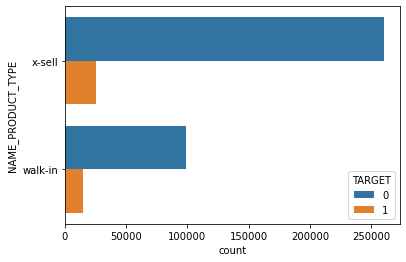

In [92]:
# Distribution of NAME PRODUCT TYPE by Target

sns.countplot(data = merged_dataset, y='NAME_PRODUCT_TYPE', hue='TARGET')
plt.show()

**`Inferences:`** 'x-sell' product type has significantly lower default rate when compared to 'walk-in'.

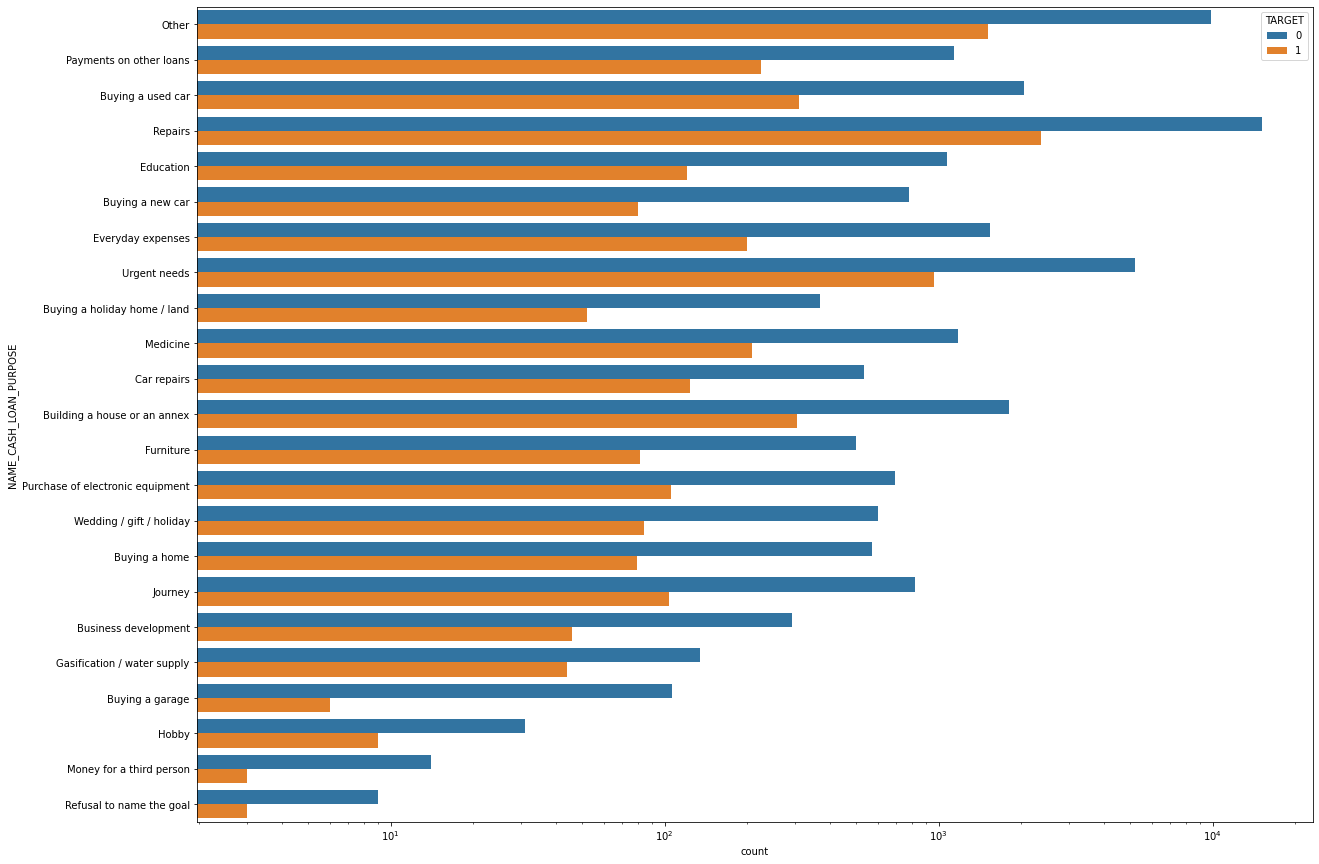

In [93]:
# Distribution of NAME CONTRACT STATUS by Target
plt.figure(figsize=[20,15])
sns.countplot(data = merged_dataset, y='NAME_CASH_LOAN_PURPOSE', hue='TARGET')
plt.xscale('log')
plt.show()

**`Inferences:`** Loan purposes with 'Repairs' are facing more difficulites in repayment of loan on time.

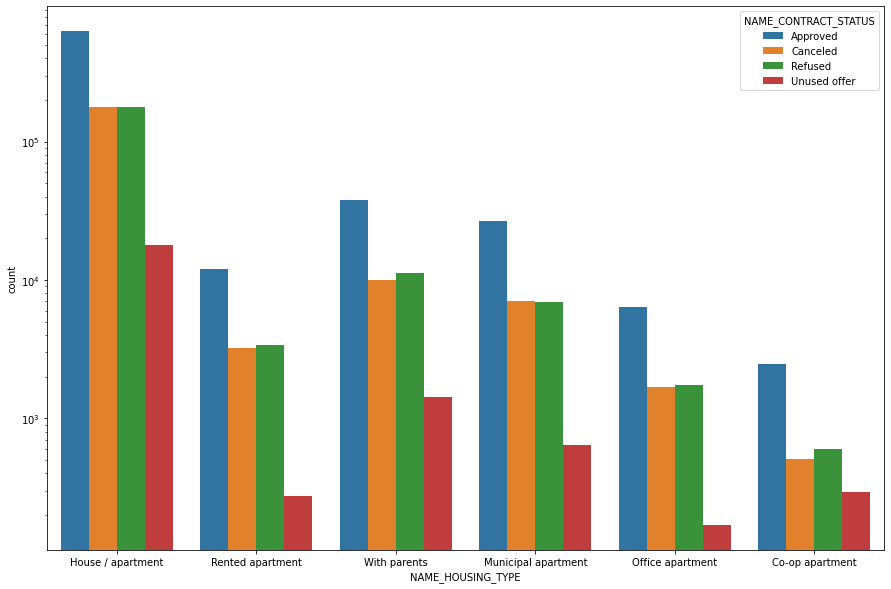

In [94]:
# House Type vs Contract Status

plt.figure(figsize=[15,10])
sns.countplot(data = merged_dataset, x='NAME_HOUSING_TYPE', hue='NAME_CONTRACT_STATUS')
plt.yscale('log')
plt.show()

**`Inferences:`**: People having their own house/apartment have maximum number of applications along with good approval rate.

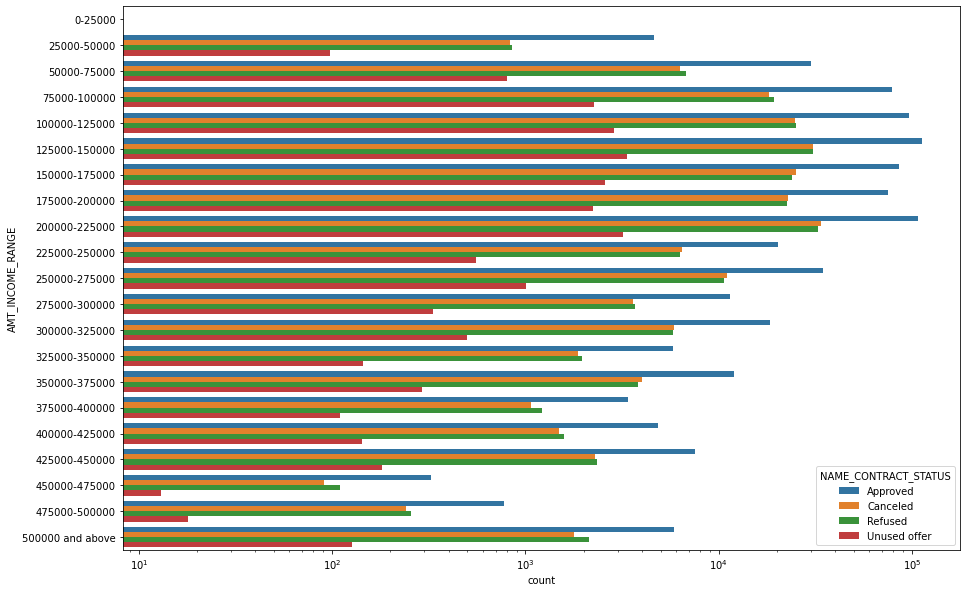

In [95]:
# Impact of Income on Approval
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,100000000]
ranges=['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

merged_dataset['AMT_INCOME_RANGE']=pd.cut(merged_dataset['AMT_INCOME_TOTAL'],bins,labels=ranges)

plt.figure(figsize=[15,10])
sns.countplot(data = merged_dataset, y='AMT_INCOME_RANGE', hue='NAME_CONTRACT_STATUS')
plt.xscale('log')
plt.show()

**`Inferences:`**: There's nothing major coming out from this analysis

## CONCLUSION

- Banks should focus more on Female applicants as they have lower payment difficulty rate than Males. 

- Banks should focus more on 'Businessmen', 'Students', 'Pensioner' as they don't have any payment difficulties.

- Banks should focus less on Business Entity Type 3 and should focus more on Government employees.

- Banks should continue focussing on 'x-sell' as it has low default rate.

- Also they should focus less on 'Repairs' specific loans as we saw they've faced more difficulty in repayment on time.